# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

In [1]:
#Marketing is crucial for the growth and sustainability of any business. 
#One of the key points for marketers is to know their customers and identify their needs. 
#By understanding the customer, marketers can launch a targeted marketing campaign that is tailored for specific needs

In [ ]:
#In this case study, you have been hired as a consultant to a bank in New York City.
#The bank has extensive data on their customers for the past 6 months. 
#The marketing team at the bank wants to launch a targeted ad marketing campaign by dividing their customers into atleast 3 distinctive groups.

In [ ]:
### Model used ->

#K- means: KMeans clustering is used to group similar data points together based on their feature representations.
#It assumes that data points within a cluster are more similar to each other than to points in other clusters.

#PCA:PCA is a linear dimensionality reduction technique that aims to capture the maximum variance in the data using orthogonal components (principal components).
:
#Autoencoders: Autoencoders are primarily used for dimensionality reduction and feature learning. They try to encode the input data into a lower-dimensional space while maintaining important features.

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [ ]:
# Importing Pandas for data manipulation and analysis
import pandas as pd

# Importing NumPy for numerical operations
import numpy as np

# Importing Seaborn for data visualization
import seaborn as sns

# Importing Matplotlib for creating plots and charts
import matplotlib.pyplot as plt

# Importing StandardScaler and normalize from scikit-learn for data preprocessing
from sklearn.preprocessing import StandardScaler, normalize

# Importing KMeans from scikit-learn for clustering
from sklearn.cluster import KMeans

# Importing PCA (Principal Component Analysis) from scikit-learn for dimensionality reduction
from sklearn.decomposition import PCA


In [ ]:
# You have to include the full link to the csv file containing your dataset
creditcard_df = pd.read_csv('Marketing_data.csv')

# CUSTID: Identification of Credit Card holder
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure of credit card service for user

In [ ]:
creditcard_df

In [ ]:
# Displaying a summary of the DataFrame's information
# This includes data types, non-null counts, and memory usage

creditcard_df.info()
# 18 features with 8950 points

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
# describe() is used to generate descriptive statistics
# This provides a summary of central tendency, dispersion, and shape of the distribution of the numerical columns

creditcard_df.describe()

##Key points -

# Mean balance is $1564
# Balance frequency is frequently updated on average ~0.9
# Purchases average is $1000
# one off purchase average is ~$600
# Average purchases frequency is around 0.5
# average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
# Average credit limit ~ 4500
# Percent of full payment is 15%
# Average tenure is 11 years

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
# Let's see who made one off purchase of $40761!
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.25]


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [ ]:
# Finding the maximum value in the 'CASH_ADVANCE' column of the 'creditcard_df' DataFrame

creditcard_df['CASH_ADVANCE'].max()

47137.21176

In [ ]:
# Let's see who made cash advance of $47137!
# This customer made 123 cash advance transactions!!
# Never paid credit card in full

creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.21176]


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


# TASK #3: VISUALIZE AND EXPLORE DATASET

<Axes: >

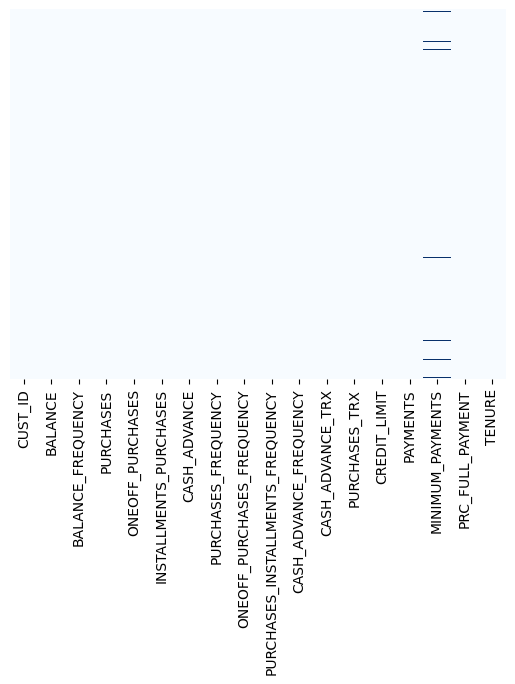

In [ ]:
# Using Seaborn's heatmap to visualize missing values in a DataFrame
# The heatmap displays True for missing values (NaN) and False for non-missing values


# sns.heatmap(): Seaborn's function for creating a heatmap
# - creditcard_df.isnull(): Returns a DataFrame of the same shape as creditcard_df, with True for missing values and False for non-missing values
# - yticklabels=False: Do not show y-axis tick labels for better readability
# - cbar=False: Do not display the color bar, as it's not needed in this case
# - cmap="Blues": Use the Blue color map for the heatmap


sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [ ]:
# Checking for missing values in each column of the 'creditcard_df' DataFrame and summing them up
# This helps us understand how many missing values exist in each column

creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT'
# This is done for rows where 'MINIMUM_PAYMENTS' is originally null

#.loc[]: This is used for label-based indexing, allowing you to select and modify specific rows and columns in the DataFrame.
#(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True): This condition is used to identify rows where the 'MINIMUM_PAYMENTS' column has missing values (null values).
#creditcard_df['MINIMUM_PAYMENTS'].mean(): Calculates the mean (average) value of the 'MINIMUM_PAYMENTS' column.

creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()


In [ ]:
# Fill up the missing elements with mean of the 'CREDIT_LIMIT'
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

<Axes: >

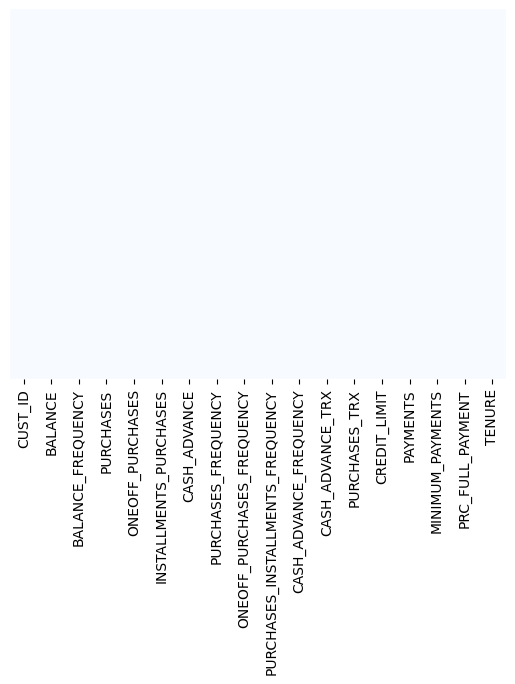

In [ ]:
## Again checking missing values
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [ ]:
# Let's see if we have duplicated entries in the data
creditcard_df.duplicated().sum()

0

In [ ]:
# Let's drop Customer ID since it has no meaning here
## Axis=1 specifies that we are dropping a column, inplace=True modifies the DataFrame in place

creditcard_df.drop("CUST_ID", axis = 1, inplace= True)

In [ ]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
##checking the no. of  columns
n = len(creditcard_df.columns)
n

17

In [ ]:
##Displaying name of columns
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

<ipython-input-22-dc2c71a814e9>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
<ipython-input-22-dc2c71a814e9>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[cre

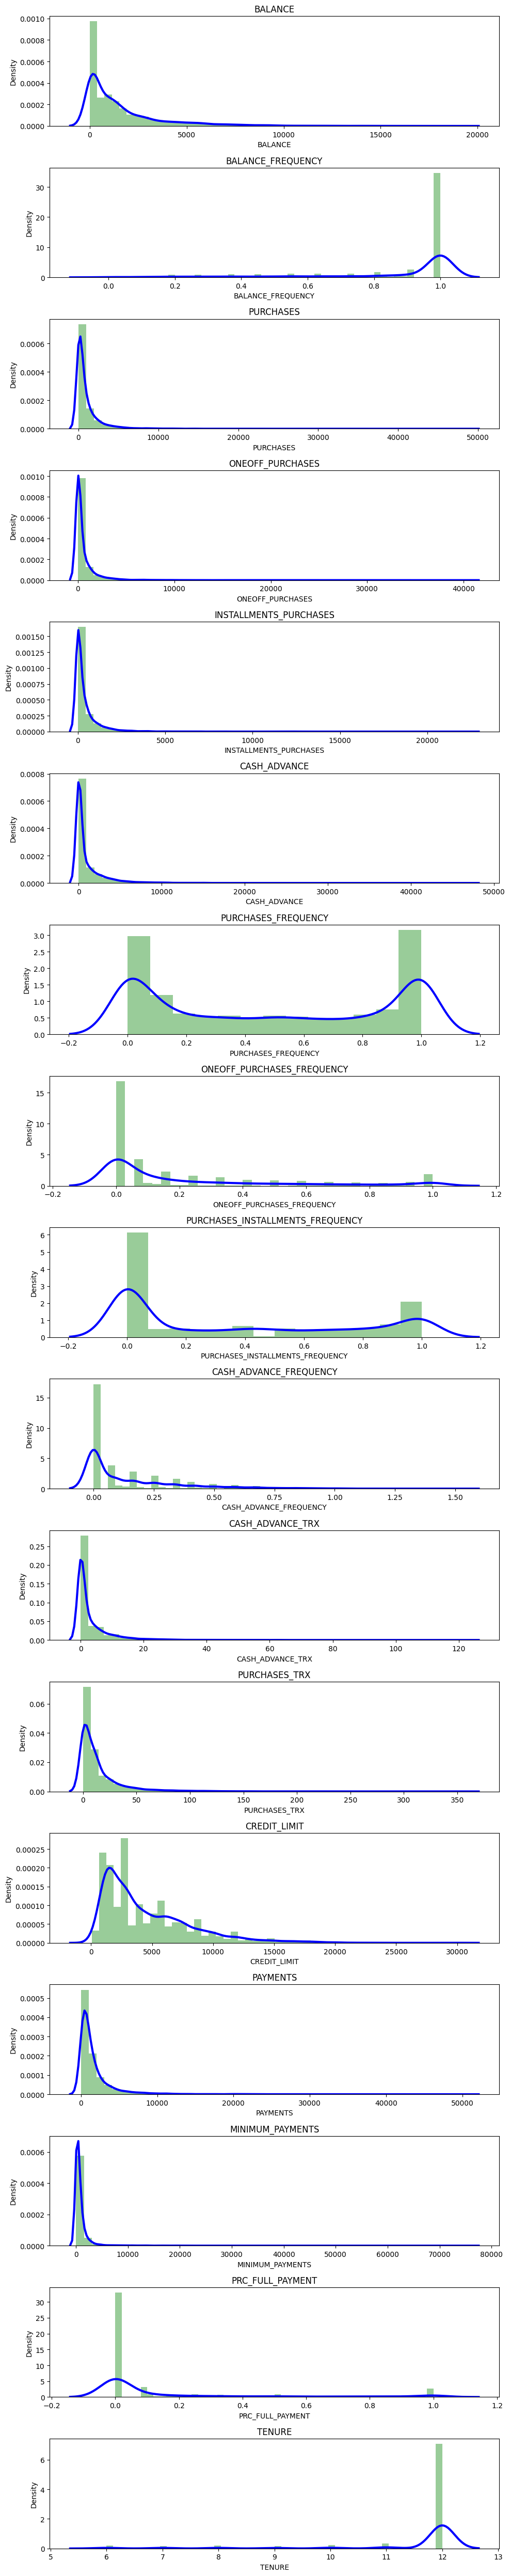

In [ ]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable.
# KDE demonstrates the probability density at different values in a continuous variable.


# Setting up a figure with a size of 10 units in width and 50 units in height
plt.figure(figsize=(10, 50))

# Looping through each column in 'creditcard_df'
for i in range(len(creditcard_df.columns)):

  # Creating subplots in a 17 rows x 1 column grid
  plt.subplot(17, 1, i+1)

  # Plotting a kernel density estimate (KDE) and a histogram for the current column
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})

  # Adding a title to the subplot with the name of the current column
  plt.title(creditcard_df.columns[i])

# Adjusting the layout to prevent overlapping of subplots
plt.tight_layout()



##Key Points

# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure

In [ ]:
# sns.pairplot(creditcard_df)
# Correlation between 'PURCHASES' and ONEOFF_PURCHASES & INSTALMENT_PURCHASES
# Trend between 'PURCHASES' and 'CREDIT_LIMIT' & 'PAYMENTS'


In [ ]:
# Calculating the correlation matrix for the columns in the 'creditcard_df' DataFrame
correlations = creditcard_df.corr()


<Axes: >

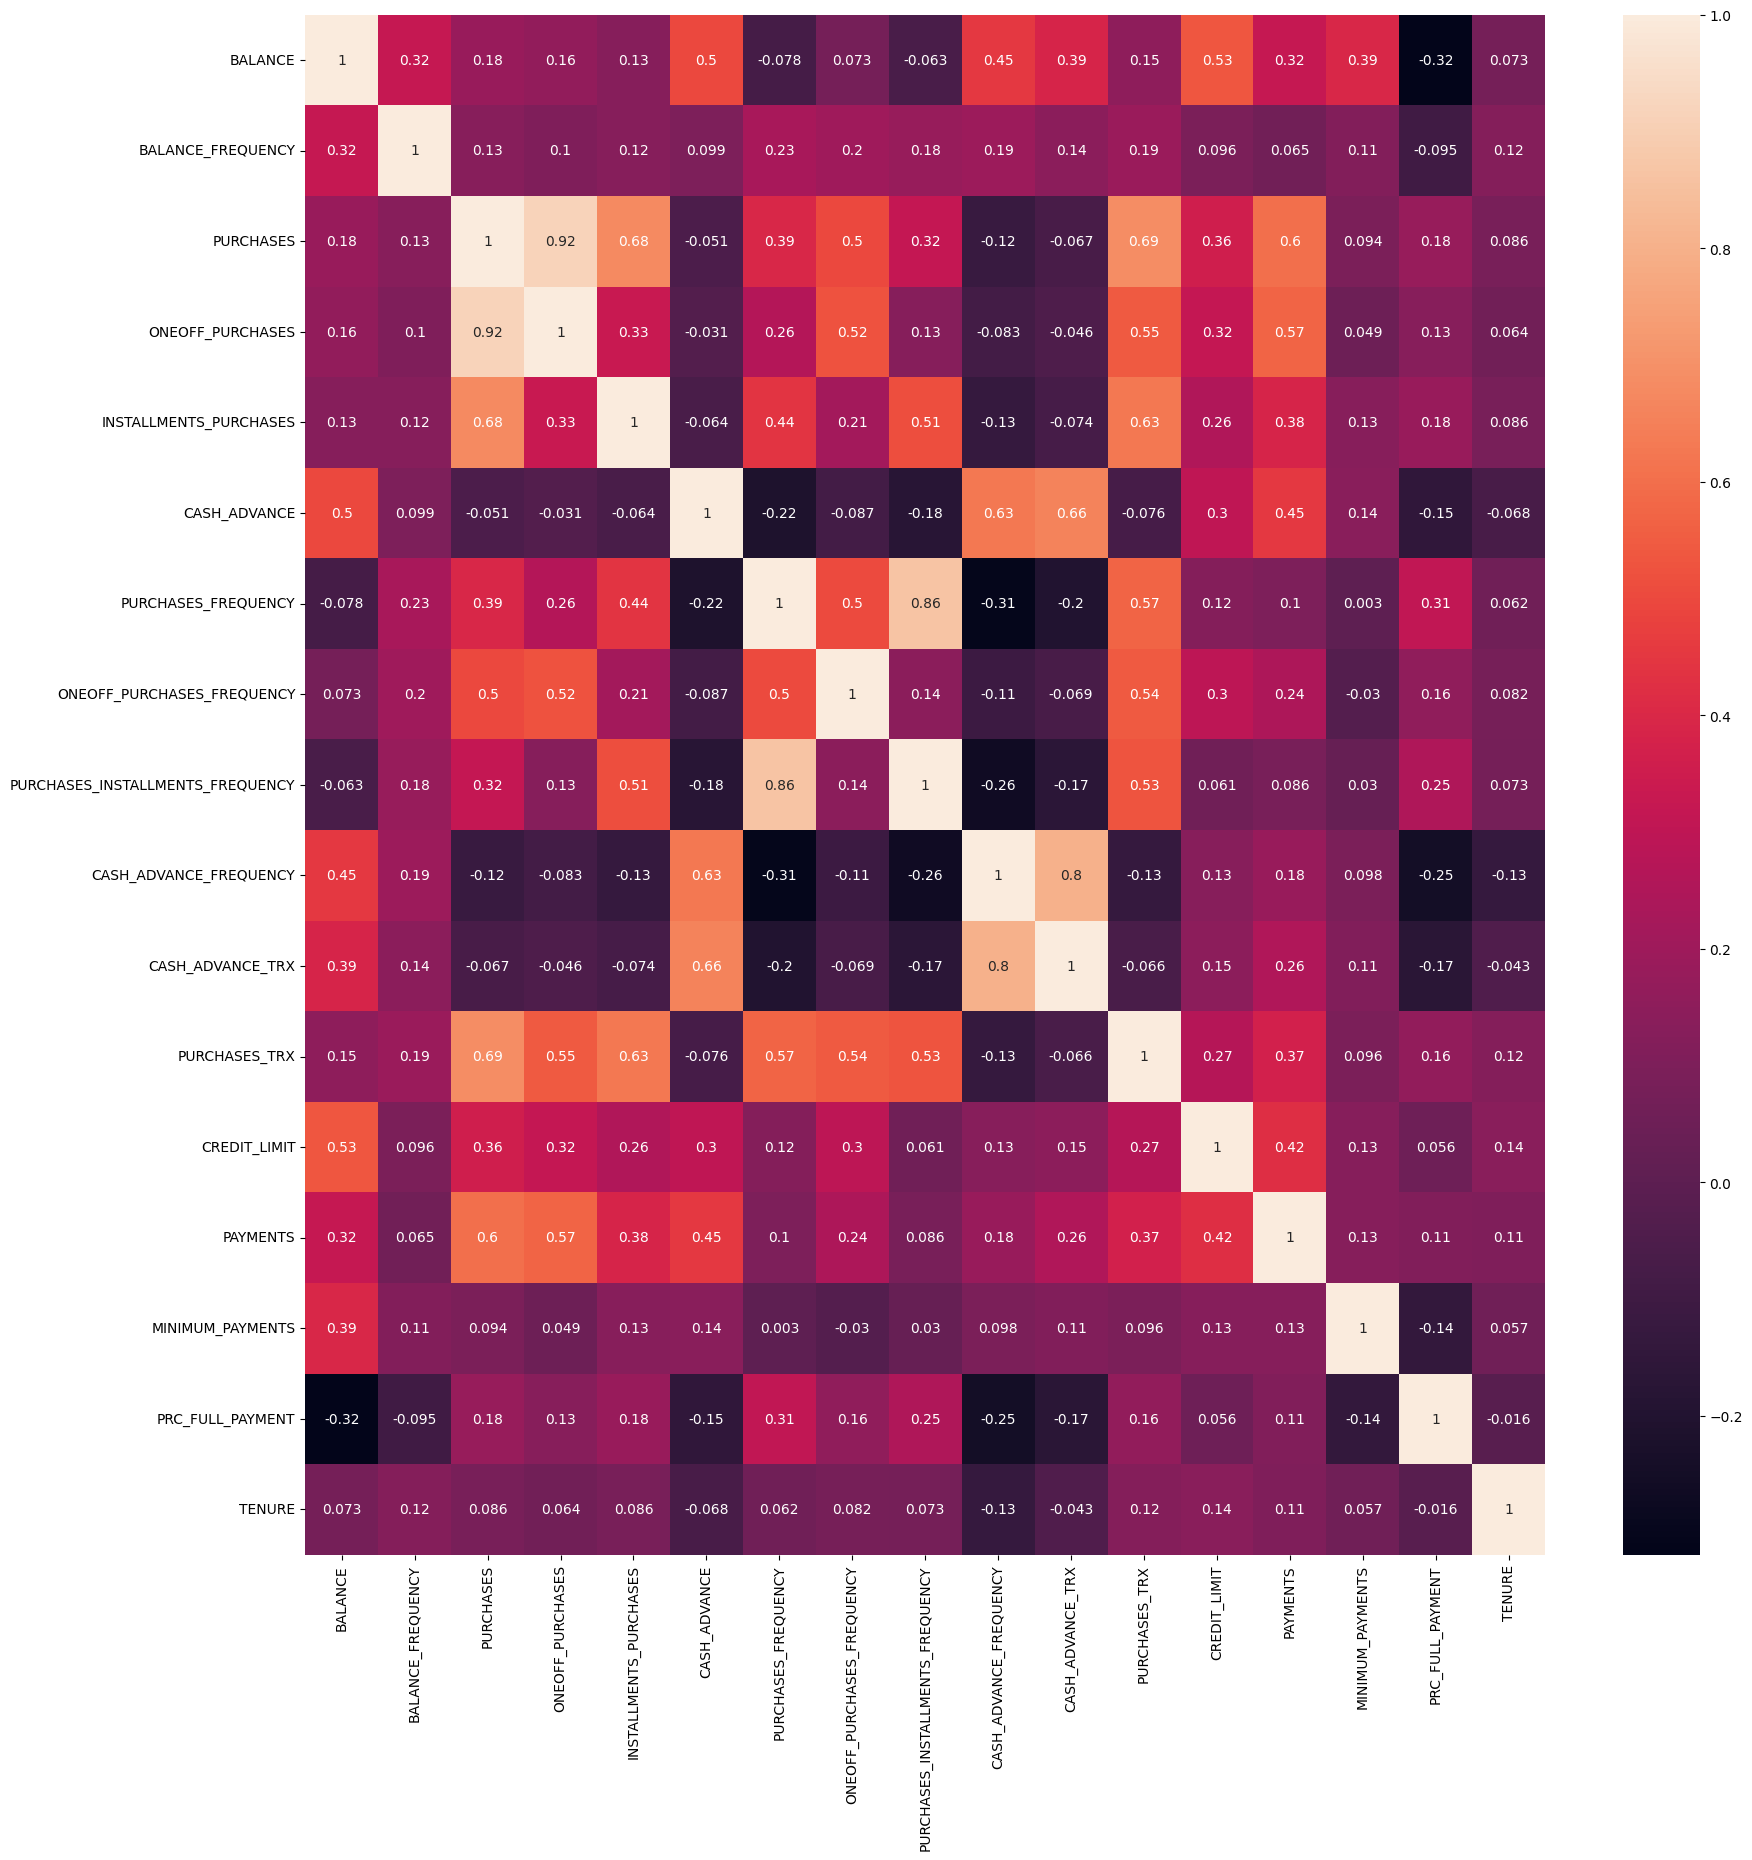

In [ ]:
# Creating a subplot with a size of 20 units in width and 20 units in height
f, ax = plt.subplots(figsize=(20, 20))

# Generating a heatmap of the correlation matrix with annotation
sns.heatmap(correlations, annot=True)

# 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments.
# Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'


# TASK #4: UNDERSTAND THE THEORY AND INTUITON BEHIND K-MEANS

In [2]:
# K-Means Clustering: Theory and Intuition

# K-Means is an unsupervised machine learning algorithm used for clustering data points into distinct groups.
# The primary objective is to partition data into K clusters, where each data point belongs to the cluster with the nearest mean.

# Key Concepts:

# 1. Initialization:
#    - Randomly select K initial cluster centroids (mean points).
#    - These centroids represent the initial cluster centers.

# 2. Assignment Step:
#    - Assign each data point to the cluster whose centroid is closest (usually based on Euclidean distance).
#    - Form K clusters based on proximity to centroids.

# 3. Update Step:
#    - Recalculate the centroid of each cluster by taking the mean of all points assigned to that cluster.
#    - Move the centroid to the center of its assigned points.

# 4. Iteration:
#    - Repeat the assignment and update steps until convergence.
#    - Convergence occurs when the assignment of points to clusters remains unchanged or changes very little.


# TASK #5: FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

- The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset.
- If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.
- Source:
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [ ]:
# Creating an instance of StandardScaler
scaler = StandardScaler()

# Scaling the features of the 'creditcard_df' DataFrame
# StandardScaler transforms the data to have a mean of 0 and a standard deviation of 1
# Scaling refers to adjusting the range of features to make them comparable.

creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [ ]:
# Checking the shape of the 'creditcard_df_scaled' DataFrame
creditcard_df_scaled.shape

(8950, 17)

In [ ]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

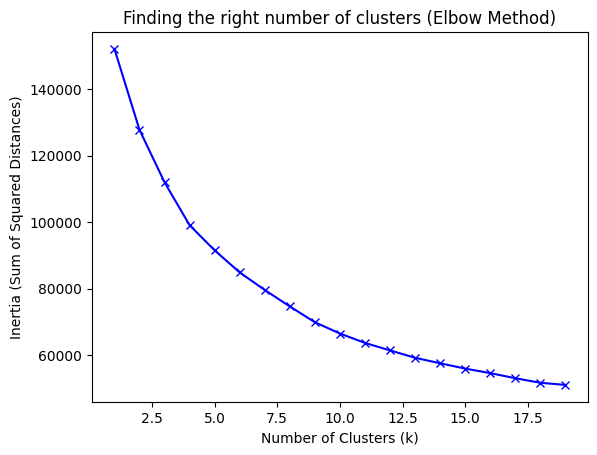

In [ ]:
# Empty list to store the inertia (sum of squared distances within clusters) for different values of k
scores_1 = []

# Range of values for the number of clusters (k)
range_values = range(1, 20)

# Loop through different values of k
for i in range_values:
  # Create a KMeans instance with the current value of k
  kmeans = KMeans(n_clusters=i)

  # Fit the model to the scaled data
  kmeans.fit(creditcard_df_scaled)

  # Append the inertia (sum of squared distances within clusters) to the scores list
  scores_1.append(kmeans.inertia_)

# Plotting the results to find the "elbow" point
plt.plot(range_values, scores_1, 'bx-')
plt.title('Finding the right number of clusters (Elbow Method)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.show()

# From this we can observe that, 4th cluster seems to be forming the elbow of the curve.
# However, the values does not reduce linearly until 8th cluster.
# Let's choose the number of clusters to be 7.

# TASK #6: APPLY K-MEANS METHOD

In [ ]:
# Creating a KMeans instance with 8 clusters
kmeans = KMeans(n_clusters=8)

# Fitting the KMeans model to the scaled data
kmeans.fit(creditcard_df_scaled)

# Assigning cluster labels to each data point
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Checking the shape of the cluster centers
kmeans.cluster_centers_.shape



(8, 17)

In [ ]:

# Creating a DataFrame to store the cluster centers
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=creditcard_df.columns)

# Displaying the cluster centers DataFrame
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.012182,0.368095,-0.362976,-0.246194,-0.405864,-0.075754,-0.872595,-0.405329,-0.768797,0.146986,-0.019984,-0.490803,-0.341831,-0.266871,-0.060905,-0.454787,-0.015768
1,-0.400575,0.306390,-0.063105,-0.257643,0.324083,-0.361745,0.980270,-0.414865,1.175160,-0.462450,-0.357902,0.134983,-0.318236,-0.244743,-0.119512,0.365359,-0.027511
2,0.987060,0.465050,2.430562,1.817381,2.408243,-0.157506,1.166522,1.584789,1.267266,-0.282229,-0.156567,3.036172,1.274526,1.420759,0.343945,0.277809,0.338877
3,-0.698400,-2.139939,-0.317882,-0.236656,-0.316746,-0.307087,-0.565839,-0.435534,-0.460052,-0.488049,-0.362249,-0.428126,-0.213933,-0.222099,-0.255380,0.253372,-0.153700
4,1.582238,0.373033,-0.229708,-0.162703,-0.244296,1.962513,-0.485020,-0.213126,-0.430980,1.921453,1.860252,-0.282772,0.966757,0.750021,0.356294,-0.390044,-0.091159
5,1.819469,0.301643,12.207777,12.296446,6.272587,0.242957,1.002411,2.032081,0.866148,-0.392172,-0.124384,4.369530,3.261192,8.782991,1.003073,1.152351,0.300900
6,-0.131488,0.392862,0.494335,0.618709,0.032031,-0.327339,0.946223,1.825673,0.158386,-0.398485,-0.320701,0.573450,0.401987,0.111304,-0.156039,0.384228,0.199014
7,1.180370,0.465753,-0.056179,-0.284877,0.389819,-0.031301,0.036912,-0.555727,0.276551,-0.251168,-0.083087,0.148826,-0.069372,-0.136715,10.521058,-0.525551,0.292749


In [ ]:
# In order to understand what these numbers mean, let's perform inverse transformation
# Inverse transforming the cluster centers to the original scale
cluster_centers = scaler.inverse_transform(cluster_centers)

# Creating a DataFrame to store the cluster centers in the original scale
cluster_centers = pd.DataFrame(data=cluster_centers, columns=creditcard_df.columns)

# Displaying the cluster centers DataFrame in the original scale
cluster_centers

# First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1539.119281,0.964469,227.701685,183.805330,44.049684,820.010633,0.140136,0.081540,0.058898,0.164558,3.112448,2.510316,3250.727877,960.578782,722.270894,2.069729e-02,11.496217
1,730.711446,0.949852,868.380111,164.802442,704.131653,220.275909,0.883780,0.078695,0.831476,0.042603,0.806407,18.064995,3336.577708,1024.637300,585.688504,2.605760e-01,11.480501
2,3618.957536,0.987437,6196.138621,3608.917984,2588.812149,648.573700,0.958532,0.675231,0.868081,0.078667,2.180371,90.177719,9131.697613,5846.100779,1665.755499,2.349689e-01,11.970822
3,110.814644,0.370339,324.044442,199.636450,124.638070,334.895293,0.263252,0.072529,0.181601,0.037481,0.776744,4.068217,3716.072786,1090.187952,269.053697,2.278215e-01,11.311628
4,4857.770067,0.965639,512.430298,322.384516,190.153826,5094.351832,0.295689,0.138878,0.193155,0.519647,15.943677,7.681190,8011.907062,3904.381370,1694.533957,3.963333e-02,11.395324
5,5351.546106,0.948727,27085.309200,21002.018800,6083.290400,1488.363253,0.892667,0.808667,0.708667,0.056667,2.400000,123.320000,16360.000000,27159.043527,3201.825604,4.907576e-01,11.920000
6,1290.794683,0.970336,2059.360033,1619.367713,440.032783,292.425818,0.870115,0.747091,0.427384,0.055403,1.060281,28.963666,5957.043015,2055.359252,500.565372,2.660947e-01,11.783650
7,4021.314923,0.987603,883.176591,119.600227,763.576364,913.231699,0.505165,0.036674,0.474346,0.084883,2.681818,18.409091,4242.045455,1337.367541,25383.088762,-2.775558e-17,11.909091


In [ ]:
labels.shape # Labels associated to each data point

(8950,)

In [ ]:
labels.max()

7

In [ ]:
labels.min()

0

In [ ]:
# Using the fitted KMeans model to predict cluster labels for each data point
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 6, 2, ..., 0, 0, 0], dtype=int32)

In [ ]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,6
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


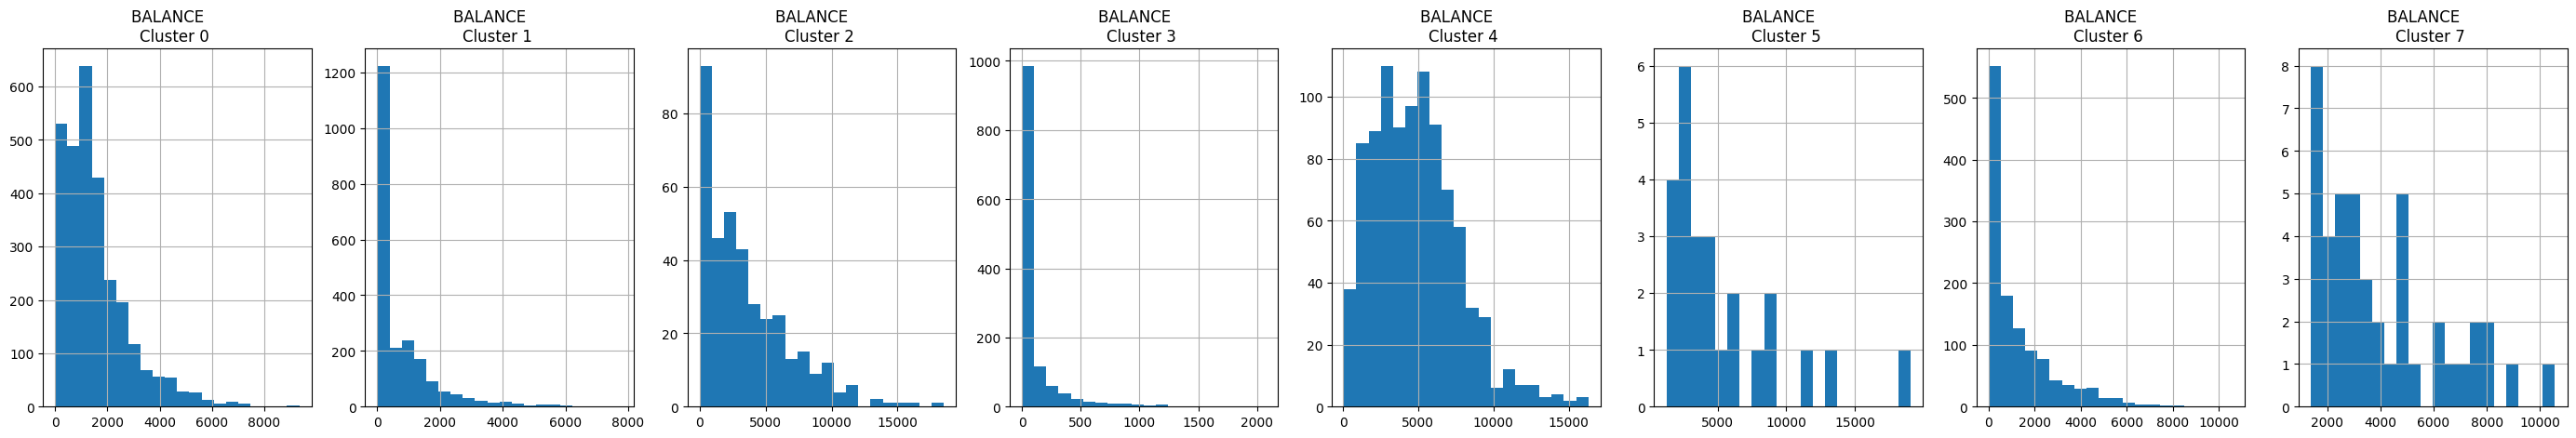

In [ ]:
# Plot the histogram of various clusters
# Loop through each column (feature) in the 'creditcard_df' DataFrame
for i in creditcard_df.columns:

    # Create a figure for the current feature
    plt.figure(figsize=(35, 5))

    # Loop through each cluster (assumed to be 8 clusters)
    for j in range(8):

        # Create subplots for each cluster
        plt.subplot(1, 8, j+1)

        # Extract data for the current cluster and feature
        cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]

        # Plot histograms for the current feature within each cluster
        cluster[i].hist(bins=20)

        # Set title for each subplot with the feature name and cluster number
        plt.title('{}    \nCluster {} '.format(i, j))

    # Display the subplots for the current feature
    plt.show()



## Now, Marketers can draw conclusions from the below histogram whom to target.

##eg:
## Cluster 5 is doing lot of cash_advance_transaction so that's the most lucrative group of customers for the bank to target because cash advances usually come with higher interest rates compared to regular credit card purchases.
## Cluster 7 have repayed 0% of payment which don't sounds good for a bank.


# TASK 7: APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

In [ ]:
# Obtain the principal components

# Import the PCA (Principal Component Analysis) module from the scikit-learn library
from sklearn.decomposition import PCA

# Create a PCA object with the desired number of components (2 in this case)
pca = PCA(n_components=2)

# Fit the PCA model to the scaled data (creditcard_df_scaled) and transform the data to its principal components
principal_comp = pca.fit_transform(creditcard_df_scaled)

# 'principal_comp' now contains the transformed data with reduced dimensionality using PCA
# Each row corresponds to an observation, and the two columns represent the two principal components
# These components capture the most significant variation in the original data


In [ ]:
# Create a dataframe with the two components

# Import the pandas library
import pandas as pd

# Create a DataFrame 'pca_df' using the principal components obtained from PCA
pca_df = pd.DataFrame(data=principal_comp, columns=['pca1', 'pca2'])

# Display the first few rows of the DataFrame
pca_df.head()

In [ ]:
# Concatenate the clusters labels to the dataframe

# Concatenate the 'pca_df' DataFrame with a new DataFrame containing the 'cluster' column
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis=1)

# Display the first few rows of the updated DataFrame
pca_df.head()

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the plot
plt.figure(figsize=(10, 10))

# Create a scatter plot using seaborn, where 'pca1' and 'pca2' are plotted on the x and y axes, respectively
# Points are colored based on the 'cluster' column, and a custom color palette is specified
ax = sns.scatterplot(x="pca1", y="pca2", hue="cluster", data=pca_df, palette=['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black'])

# Show the plot
plt.show()


# TASK #8: UNDERSTAND THE THEORY AND INTUITION BEHIND AUTOENCODERS

In [3]:
# AUTOENCODERS: THEORY AND INTUITION

# Autoencoders are a type of neural network designed for unsupervised learning and dimensionality reduction.
# The primary objective is to learn an efficient representation of input data by compressing it into a lower-dimensional space.

# ARCHITECTURE OF AUTOENCODERS

# Encoder:
# - The encoder maps input data to a lower-dimensional representation.
# - It typically consists of dense layers with activation functions like ReLU.

# Latent Space:
# - The compressed representation of input data, also called the latent space.
# - It has fewer dimensions than the input, capturing essential features.

# Decoder:
# - The decoder reconstructs the input from the compressed representation.
# - It mirrors the structure of the encoder in reverse.


# TASK #9: APPLY AUTOENCODERS (PERFORM DIMENSIONALITY REDUCTION USING AUTOENCODERS)

In [ ]:
##Dense Layers: These layers represent fully connected layers with a specified number of neurons. The choice of activation function is ReLU, a common choice for hidden layers.

##Initializer: The 'glorot_uniform' initializer is used to set the initial weights of the layers. It draws samples from a truncated normal distribution.

##Autoencoder: The autoencoder model is created using the Model class with the input layer and the decoded layer as output. It is trained to reconstruct the input data.

##Encoder: Another model is created using the same input layer but with the encoded layer as the output. This encoder model is used for dimensionality reduction.

##Compilation: The autoencoder model is compiled using the Adam optimizer and mean squared error loss, indicating that it's trained to minimize the reconstruction error between the input and the output

# Import necessary libraries
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import Adam

# Define the encoding dimension
encoding_dim = 7

# Define the input layer with shape (17,)
input_df = Input(shape=(17,))

# Encoder layers
# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution
x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(x)

# Encoded layer with dimension 10
encoded = Dense(10, activation='relu', kernel_initializer='glorot_uniform')(x)

# Decoder layers
x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)

# Decoded layer with original dimension (17,)
decoded = Dense(17, kernel_initializer='glorot_uniform')(x)

# Define the autoencoder
autoencoder = Model(input_df, decoded)

# Define the encoder
encoder = Model(input_df, encoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')



In [ ]:
# Check the shape of the scaled credit card DataFrame
creditcard_df_scaled.shape

In [ ]:
# Training the autoencoder model on the scaled credit card data
# epochs: Number of times the entire dataset is passed forward and backward through the neural network during training.

autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size = 128, epochs = 25,  verbose = 1)

In [ ]:
# Save the weights of the autoencoder model to a file named 'autoencoder.h5'
autoencoder.save_weights('autoencoder.h5')

In [ ]:
# Use the trained encoder to generate predictions (latent representations) for the scaled credit card data
pred = encoder.predict(creditcard_df_scaled)

In [ ]:
pred.shape

In [ ]:
# Initialize an empty list to store the inertia scores
scores_2 = []

# Define a range of values for the number of clusters (1 to 19)
range_values = range(1, 20)

# Iterate over the range of cluster values
for i in range_values:
    # Create a KMeans clustering model with the current number of clusters
    kmeans = KMeans(n_clusters=i)

    # Fit the KMeans model on the encoded representations (latent features) obtained from the autoencoder
    kmeans.fit(pred)

    # Append the inertia (within-cluster sum of squares) score to the scores list
    scores_2.append(kmeans.inertia_)

# Plot the elbow curve to visualize the inertia scores for different cluster values
plt.plot(scores_2, 'bx-')
plt.title('Finding the Right Number of Clusters')
plt.xlabel('Clusters')
plt.ylabel('Inertia Scores')
plt.show()


In [ ]:
# Plotting two sets of inertia scores on the same graph
plt.plot(scores_1, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'g')

In [ ]:
# Create a KMeans clustering model with 4 clusters
kmeans = KMeans(n_clusters=4)

# Fit the KMeans model on the encoded representations (latent features) obtained from the autoencoder
kmeans.fit(pred)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Perform KMeans clustering on the original scaled credit card data
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)

In [ ]:
# Concatenate the original creditcard_df DataFrame with the 'cluster' column
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis=1)

# Display the first few rows of the resulting DataFrame
df_cluster_dr.head()


In [ ]:
# Create a PCA (Principal Component Analysis) model with 2 components
pca = PCA(n_components=2)

# Transform the encoded representations using PCA
prin_comp = pca.fit_transform(pred)

# Create a DataFrame 'pca_df' with the principal components as columns
pca_df = pd.DataFrame(data=prin_comp, columns=['pca1', 'pca2'])

# Display the first few rows of the resulting DataFrame
pca_df.head()

In [ ]:
# Concatenate the pca_df DataFrame with the 'cluster' column
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis=1)

# Display the first few rows of the resulting DataFrame
pca_df.head()

In [ ]:
# Set the size of the plot
plt.figure(figsize=(10, 10))

# Create a scatter plot using seaborn
ax = sns.scatterplot(x="pca1", y="pca2", hue="cluster", data=pca_df, palette=['red', 'green', 'blue', 'yellow'])

# Show the plot
plt.show()

Completed!